# LetsGrowMoreVIP - Data Science Intern

## Advance Level Task - Next Word Prediction

### Author - Vandana Prajapati

#### Using Tensorflow and Keras library train a RNN, to predict the next word

In [2]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import heapq
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [5]:
text_file = open('C:\\1661-0.txt',mode = 'r', encoding='utf-8-sig')
text = text_file.read().lower()

### Tokenization

In [6]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

### List of sorted unique words

In [8]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

### Feature Engineering

In [9]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [10]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

### Building RNN

In [11]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

### Training Model

In [12]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [13]:
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history

Epoch 1/2
811/811 [==============================] - 213s 252ms/step - loss: 6.0095 - accuracy: 0.1074 - val_loss: 7.0612 - val_accuracy: 0.1020
Epoch 2/2
811/811 [==============================] - 178s 220ms/step - loss: 5.7752 - accuracy: 0.1474 - val_loss: 7.9656 - val_accuracy: 0.1082


### Evaluating Model

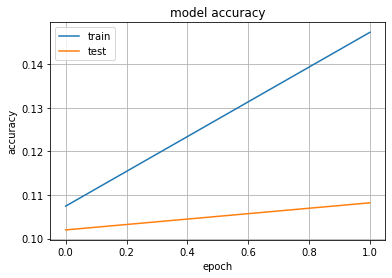

In [14]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.show()

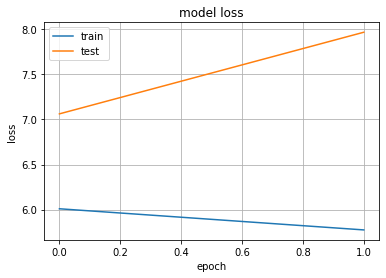

In [15]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.show()

In [16]:
import pickle
model.save('Next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))

### Loading the Model

In [17]:
model = load_model('Next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

### Testing the Model

In [18]:
def preprocess_input(text):
    if text == "":
        return ("0")
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x

In [19]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [20]:
def predict_completions(textx, n=3):
    preds = model.predict(textx, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [21]:
quotes = "It is hard enough to remember my opinions without also remembering"

In [22]:
print("Original Sentence:",quotes)
seq = quotes[:20].lower()
seq = " ".join(tokenizer.tokenize(seq))
print("Input sequence:",seq)
x = preprocess_input(seq)
print("Predicted Words:", predict_completions(x))

Original Sentence: It is hard enough to remember my opinions without also remembering
Input sequence: it is hard enough to
it
is
hard
enough
to
Predicted Words: ['the', 'be', 'me']
